# STA 141B Final Project, Magic the Gathering
## Deck Generator

In [1]:
import pandas as pd
import time
from bs4 import BeautifulSoup
import json
import numpy as np
import requests
import re
import random
import palettable
from plotnine import *
from plotnine.animation import PlotnineAnimation
from tabulate import tabulate
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from ipywidgets.embed import embed_minimal_html

from selenium.common.exceptions import TimeoutException
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager

import bokeh.models
import bokeh.plotting as bop
from bokeh.plotting import figure, show
from bokeh.io import curdoc

import warnings
warnings.filterwarnings("ignore")

In [2]:
whiteData = pd.read_csv("magicWhite.csv")
blueData = pd.read_csv("magicBlue.csv")
blackData = pd.read_csv("magicBlack.csv")
redData = pd.read_csv("magicRed.csv")
greenData = pd.read_csv("magicGreen.csv")

newWhite = pd.read_csv("onlyWhite.csv")
newBlue = pd.read_csv("onlyBlue.csv")
newBlack = pd.read_csv("onlyBlack.csv")
newRed = pd.read_csv("onlyRed.csv")
newGreen = pd.read_csv("onlyGreen.csv")

0       1.0
1       1.0
2       2.0
3       4.0
4       3.0
       ... 
2747    2.0
2748    2.0
2749    2.0
2750    2.0
2751    3.0
Name: CMC, Length: 2752, dtype: float64

In [37]:
data = newRed[(newRed["Salt"]>1)&(newRed["Salt"]<3)]

In [32]:
data = data[data["Type_x"].isin(["Artifact","Plainswalker","Sorcery"])]

In [38]:
data.reset_index(drop=True)

Unnamed: 0  CMC                       Name Rarity       Type_x  \
0            5  2.0              Nature's Lore      C      Sorcery   
1            6  2.0        Heroic Intervention      R      Instant   
2            9  1.0           Ignoble Hierarch      R     Creature   
3           12  1.0             Llanowar Elves      C     Creature   
4           27  5.0  Return of the Wildspeaker      R      Instant   
..         ...  ...                        ...    ...          ...   
92        2556  3.0            Wirewood Savage      C     Creature   
93        2567  1.0         Wolfbitten Captive      R     Creature   
94        2569  5.0               Aether Helix      U      Sorcery   
95        2638  6.0                    Recycle      R  Enchantment   
96        2699  4.0         Mwonvuli Acid-Moss      C      Sorcery   

    Card Kingdom ($)  TCGPlayer ($)  Face to Face ($)  Cardmarket (€)  \
0               2.49           1.70              2.57            1.09   
1              10.99           7.83              8.10            6.31   
2               2.49           2.54              2.94            3.33   
3               0.49           0.25              0.55            0.16   
4               1.49           1.55              1.47            1.02   
..               ...            ...               ...             ...   
92              0.35           0.16              0.11            0.08   
93              0.69           0.51               NaN            0.56   
94              0.35           0.02              0.18            0.12   
95              1.99           4.64              2.57            2.65   
96              2.49           1.25              2.20            0.63   

    Cardhoarder (Event Ticket - TIX)  Salt     Decks  Inclusion  Mana Cost  \
0                               0.04  0.13  459585.0       29.8     {1}{G}   
1                               0.12  0.92  440987.0       28.6     {1}{G}   
2                               0.87  0.17   85995.0       25.0        {G}   
3                               0.03  0.14  360179.0       23.4        {G}   
4                               0.07  0.27  222525.0       14.4     {4}{G}   
..                               ...   ...       ...        ...        ...   
92                              0.04  0.08    2306.0        0.1     {2}{G}   
93                              0.02  0.08    2280.0        0.1        {G}   
94                              0.03  0.00    1079.0        0.1  {3}{G}{U}   
95                              0.03  0.38    2093.0        0.1  {4}{G}{G}   
96                              0.03  0.40    1932.0        0.1  {2}{G}{G}   

                                                 Text Stats  \
0   Search your library for a Forest card, put tha...   NaN   
1   Permanents you control gain hexproof and indes...   NaN   
2   Exalted(Whenever a creature you control attack...   0/1   
3                                        {T}: Add{G}.   1/1   
4   Choose one —• Draw cards equal to the greatest...   NaN   
..                                                ...   ...   
92  Whenever a Beast enters the battlefield, you m...   2/2   
93  {1}{G}: Wolfbitten Captive gets +2/+2 until en...   1/1   
94  Return target permanent to its owner’s hand. R...   NaN   
95  Skip your draw step.Whenever you play a card, ...   NaN   
96  Destroy target land. Search your library for a...   NaN   

                                                  URL  
0      https://scryfall.com/card/cmm/904/natures-lore  
1   https://scryfall.com/card/who/233/heroic-inter...  
2   https://scryfall.com/card/mh2/166/ignoble-hier...  
3    https://scryfall.com/card/30a/206/llanowar-elves  
4   https://scryfall.com/card/lcc/252/return-of-th...  
..                                                ...  
92    https://scryfall.com/card/gvl/6/wirewood-savage  
93  https://scryfall.com/card/dka/133/wolfbitten-c...  
94     https://scryfall.com/card/stx/162/aether-helix  
95          https://scryfall.com

In [55]:
firstFilterList = ["Organization","Inginuity","Power","Emotion","Instinct"]
secondFilterList = ["Unicolor","Multicolor"]
thirdFilterList = ["aggro","control","midrange"]
fourthFilterList = ["fair","fun"]
color = None
data = None
CMCrange = None
princeCard = None
saltRange = None

firstFilter = random.choice(firstFilterList)
if firstFilter == "Organization":
    color = [newWhite,whiteData]
elif firstFilter == "Inginuity":
    color = [newBlue,blueData]
elif firstFilter == "Power":
    color = [newBlack,blackData]
elif firstFilter == "Emotion":
    color = [newRed,redData]
else:
    color = [newGreen,greenData]

secondFilter = random.choice(secondFilterList)
if secondFilter == "Unicolor":
    data = color[0]
else:
    data = color[1]

thirdFilter = random.choice(thirdFilterList)
if thirdFilter == "aggro": #up to 36 Creature cards
    CMCrange = [0,4]
    princeCard = ["Creature","Instant","Plainswalker"] #30 or more of these
elif thirdFilter == "midrange":
    CMCrange = [3,8]
    princeCard = ["Enchantment","Plainswalker","Battle"] #20 or more of these
else: # up to 30 land
    CMCrange = [7,15]
    
fourthFilter = random.choice(fourthFilterList)
if fourthFilter == "fair":
    saltRange = [0,1]
else:
    saltRange = [1,2]

data = data[(data["CMC"]>CMCrange[0])&(data["CMC"]<CMCrange[1])]
data = data[(data["Salt"]>saltRange[0])&(data["Salt"]<saltRange[1])]
newData = None
if thirdFilter!="control":
    if thirdFilter=="aggro":
        data = data[data["Type_x"].isin(princeCard)]
        if data.shape[0]>=30:
            newData = data.sample(n=30)
        else:
            newData = data[data["Type_x"].isin(princeCard)]
    else:
        data = data[data["Type_x"].isin(princeCard)]
        if data.shape[0]>=30:
            newData = data.sample(n=20,replace=False)
            addData = data.sample(n=10)
            newData = pd.concat([newData,addData])
        else:
            newData = data[data["Type_x"].isin(princeCard)]
else:
    if data.shape[0]>=30:
        newData = data.sample(n=30)
    else:
        newData = data

newData = newData.reset_index(drop=True)

for i in range(newData.shape[0]):
    
    for j in range(5):
        
    card_response = requests.get(newData["URL"][i])
    url = BeautifulSoup(card_response.text,"html.parser").find("meta",property="og:image")["content"]
    urllib.request.urlretrieve(url,"gfg.png") 
    img = Image.open("gfg.png").resize((300, 400)) 
    display(img)

Instinct
Unicolor
control
fair


Unnamed: 0   CMC                    Name Rarity       Type_x  \
0         1291   8.0               Ghoultree      R     Creature   
1          144   8.0    End-Raze Forerunners      R     Creature   
2          718   8.0            Giant Ankheg      U     Creature   
3         1264  12.0        Nyxborn Behemoth      R     Creature   
4         1152   9.0    Myojin of Life's Web      R     Creature   
5          173  10.0         Apex Devastator      M     Creature   
6           95  12.0   Ghalta, Primal Hunger      R     Creature   
7          494  11.0         Worldspine Wurm      M     Creature   
8          463   8.0              Polyraptor      M     Creature   
9          539  10.0    Impervious Greatwurm      R     Creature   
10         769   8.0     Stonehoof Chieftain      R     Creature   
11         346   8.0         Woodfall Primus      R     Creature   
12         512   9.0           The Tarrasque      M     Creature   
13         337   9.0            Titanoth Rex      U     Creature   
14        1417   9.0      Decree of Savagery      R      Instant   
15         242   9.0           Apex Altisaur      R     Creature   
16        1118   9.0        The Great Aurora      M      Sorcery   
17        1229   8.0                Bookwurm      U     Creature   
18        1044  12.0    Hierophant Bio-Titan      R     Creature   
19         351   8.0  Archetype of Endurance      U     Creature   
20        1892   8.0        Spawning Grounds      R  Enchantment   
21         287   8.0  Last March of the Ents      M      Sorcery   
22        1624   9.0          Crush of Wurms      R      Sorcery   
23         365   8.0  Kamahl, Heart of Krosa      M     Creature   
24        1504   8.0          Symbiotic Wurm      R     Creature   
25         270   9.0       Reshape the Earth      M      Sorcery   
26        2013   8.0           Gigantomancer      R     Creature   
27         573   8.0        Majestic Genesis      M      Sorcery   
28         444   8.0       Praetor's Counsel      M      Sorcery   
29        1231   9.0       Sproutback Trudge      R     Creature   

    Card Kingdom ($)  TCGPlayer ($)  Face to Face ($)  Cardmarket (€)  \
0               0.99           0.55              0.73            0.65   
1               0.69           0.25              0.73            0.14   
2               0.35           0.14              0.18            0.13   
3               0.79           0.33              0.73            0.74   
4               1.99           1.41              2.20            1.07   
5              27.99          19.26             25.79           20.12   
6               2.99           3.17              2.20            1.92   
7              10.99           8.33              9.58            8.67   
8              25.99          33.29             22.11           13.84   
9               1.99           1.53              2.20            0.75   
10              1.79           1.17              1.47            1.20   
11              0.49           0.17              0.26            0.23   
12              4.49           4.07              5.52            2.43   
13              0.69           0.27              0.73            0.19   
14              0.49           0.14              0.26            0.22   
15              4.49           4.39              4.42            3.30   
16              0.99           0.32              0.73            0.38   
17              0.35           0.06              0.18            0.16   
18              0.69           0.21              0.73            0.34   
19              0.99           0.69              0.73            1.02   
20              0.49           0.12              0.26            0.13   
21             13.99          13.92             13.26            8.89   
22              1.79           2.76              1.47            0.51   
23              3.49           2.70              2.94            2.26   
24              1.79           0.96              1.84            0.29 

In [56]:
newData = newData.reset_index(drop=True)

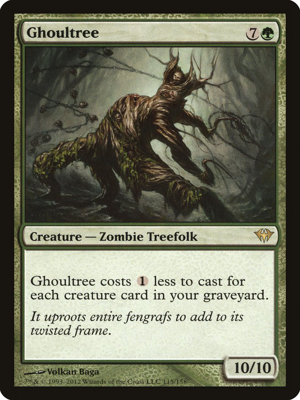

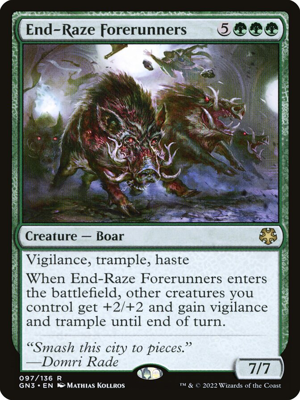

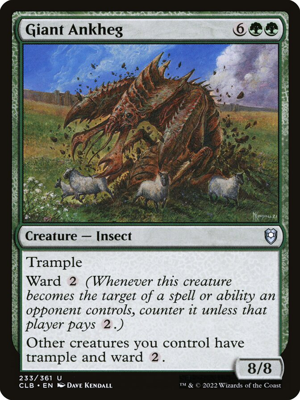

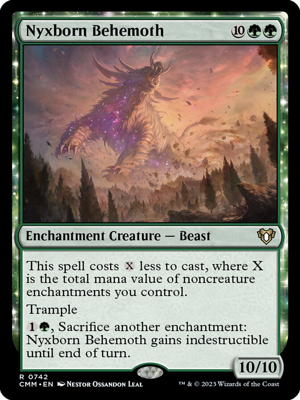

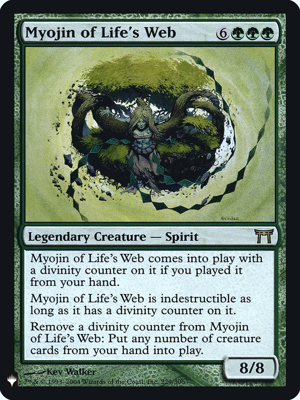

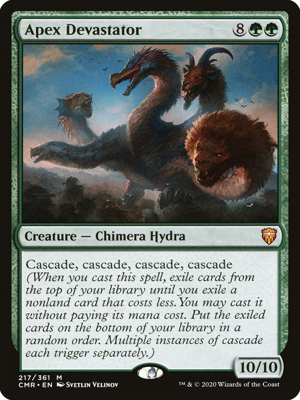

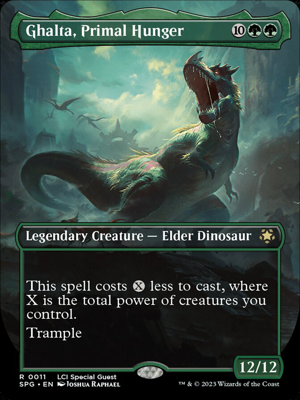

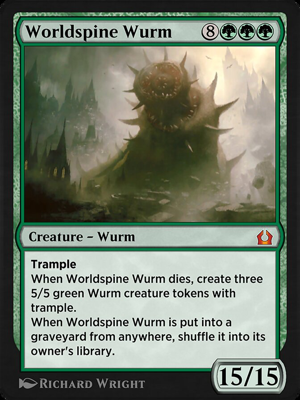

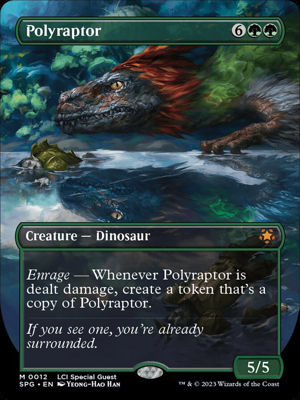

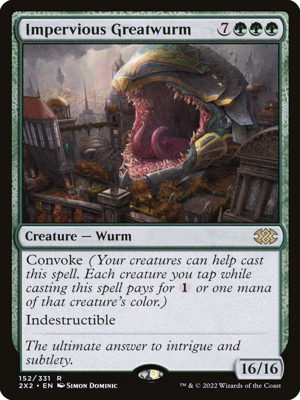

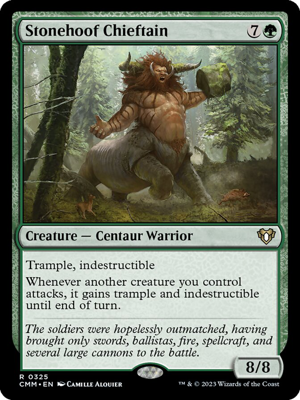

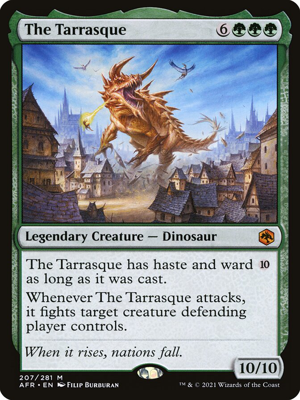

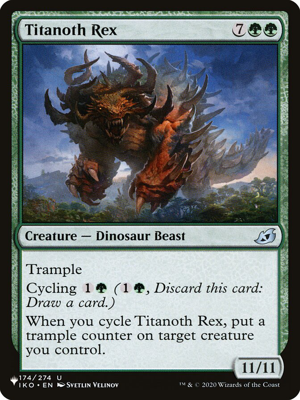

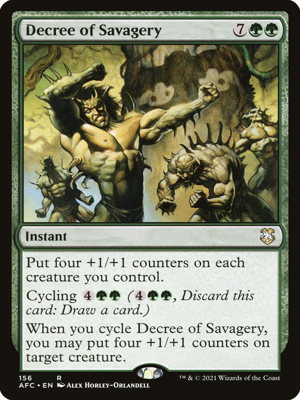

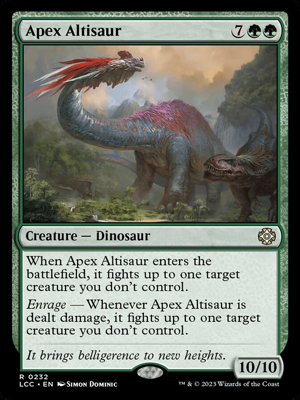

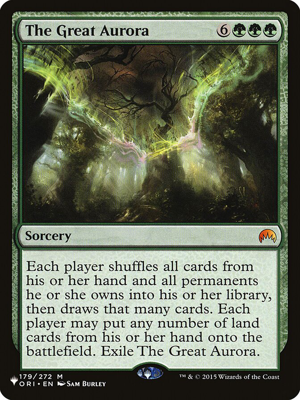

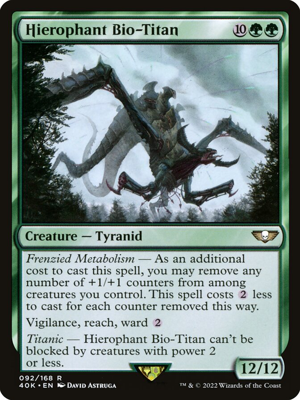

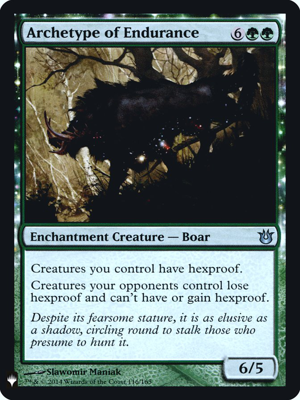

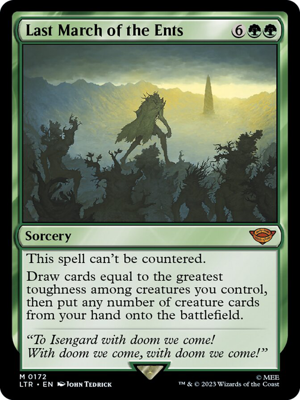

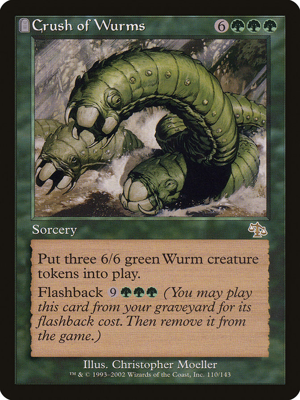

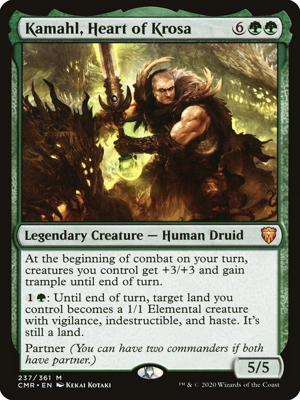

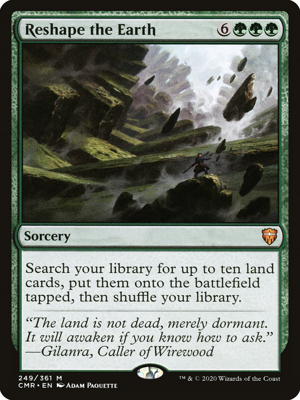

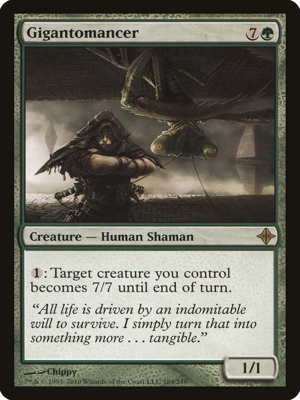

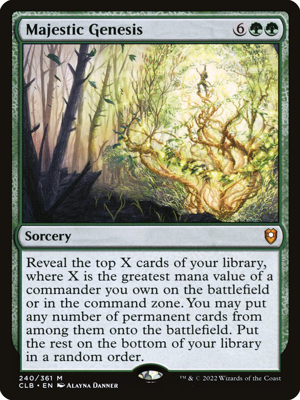

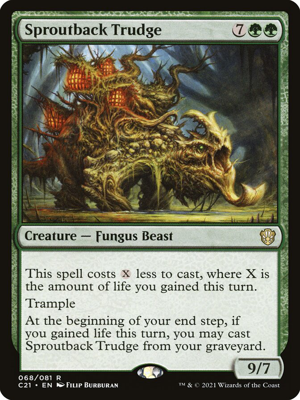

In [57]:
for i in range(newData.shape[0]):
    
    for j in range(5):
        
    card_response = requests.get(newData["URL"][i])
    url = BeautifulSoup(card_response.text,"html.parser").find("meta",property="og:image")["content"]
    urllib.request.urlretrieve(url,"gfg.png") 
    img = Image.open("gfg.png").resize((300, 400)) 
    display(img)
    #img.show()
# Creation of the lists to be fed into parse_cards function
#listSets = [set.get_text(strip=True).lower() for set in rawListSets]
#/html/body/div[3]/div[1]/div/div[1]/div